<a href="https://colab.research.google.com/github/saad1ibn2akhter/Intro_to_data_analysis_IBM_summary/blob/main/credit_score_ROAI_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from scipy import stats


In [15]:
file_path = 'train_data.csv'
df = pd.read_csv(file_path)
saved_df = df

headers = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']


df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Credit_Utilization_Ratio'] = pd.to_numeric(df['Credit_Utilization_Ratio'], errors='coerce')

# print(df.head(2))
# print(df.columns)
# print(df.info())

In [19]:
sample = df.size
avg_debt = df[df['Credit_Utilization_Ratio']>25]['Monthly_Inhand_Salary'].mean()
avg_debt = int(avg_debt)
months = df['Month'].nunique()
ssn_count = df[df['SSN'].astype(str).str.endswith('20')]['SSN'].nunique()

task1df = pd.DataFrame({
    'Samples':[sample],
    'Avg_debt': [avg_debt],
    'Unique months':[months],
    'SSN_count ':[ssn_count]
})

task1df.to_csv('output_1.csv' , index=False)



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44207 entries, 0 to 44206
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        44207 non-null  object 
 1   Customer_ID               44207 non-null  object 
 2   Month                     44207 non-null  object 
 3   Name                      44207 non-null  object 
 4   Age                       42045 non-null  float64
 5   SSN                       44207 non-null  object 
 6   Occupation                44207 non-null  object 
 7   Annual_Income             44207 non-null  object 
 8   Monthly_Inhand_Salary     44207 non-null  float64
 9   Num_Bank_Accounts         44207 non-null  int64  
 10  Num_Credit_Card           44207 non-null  int64  
 11  Interest_Rate             44207 non-null  int64  
 12  Num_of_Loan               44207 non-null  object 
 13  Type_of_Loan              44207 non-null  object 
 14  Delay_

In [21]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Changed_Credit_Limit'] =  pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df_cleaned = df.dropna()

In [22]:
Y = df_cleaned['Credit_Score']
cols_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
                'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
                'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'
                ]

X = df_cleaned.drop(columns=cols_to_drop , axis=1)



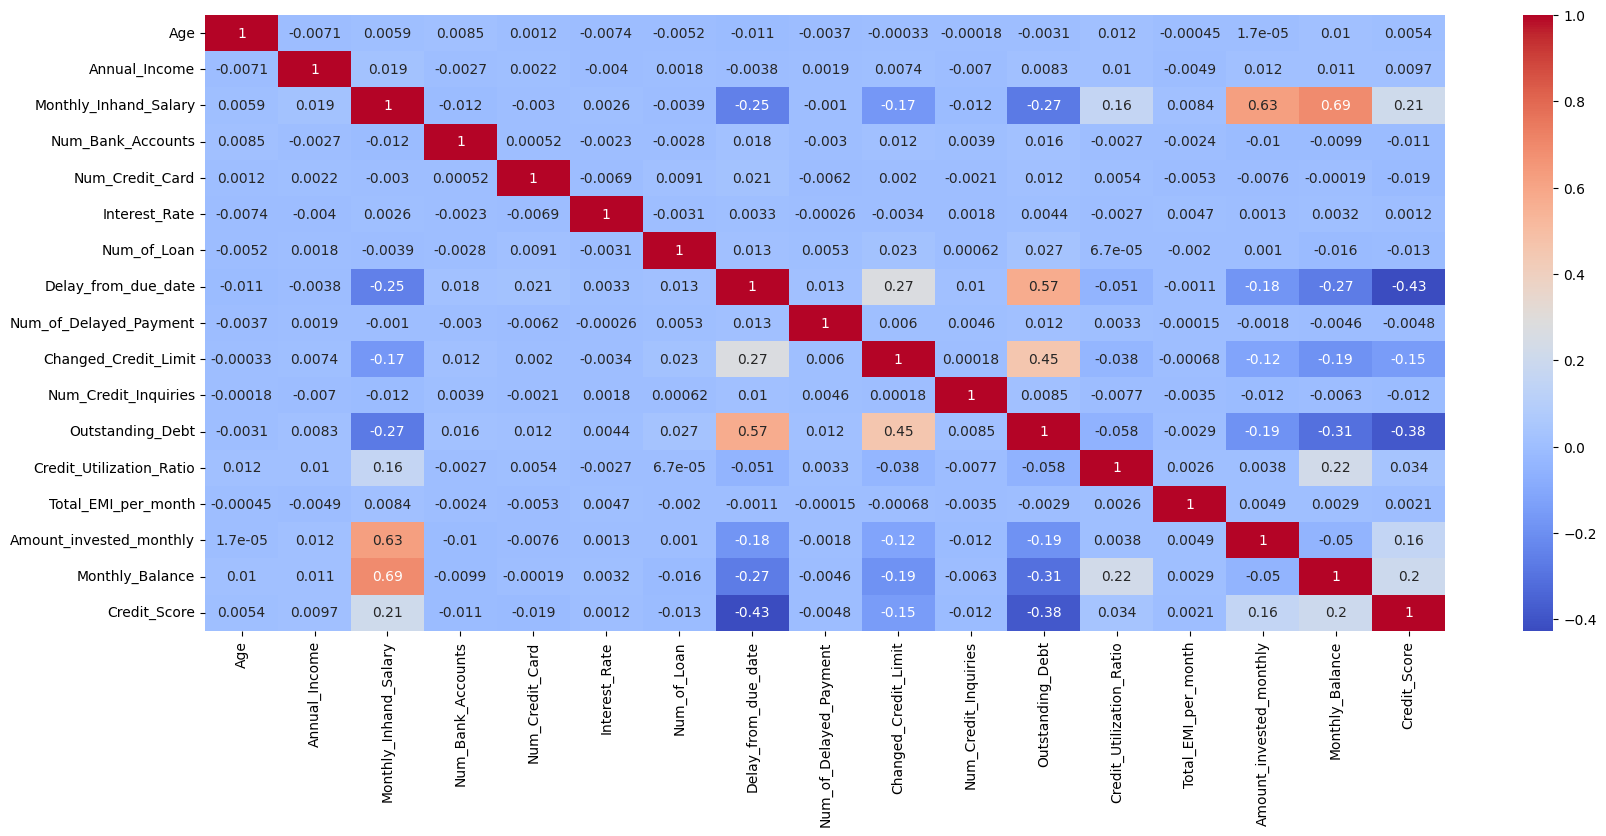

In [24]:
pd.concat([X,Y] ,axis=1).corr()
plt.figure(figsize=(20,8))
sns.heatmap(pd.concat([X,Y] , axis=1).corr(),annot=True, cmap='coolwarm')
plt.show()